Results from Level IW algorithm (for boxplot and accuracy timelime).
Two Classes Diagonal Translation. 2 Dimensional data
100 batches of 152 instances



METHOD: Static sgd as classifier
Execution time:  0.04181535820091836
Average MCC:  0.112001192614
Average macro-F1: 0.4058651792746156


C:\Users\raul\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\raul\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:516: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(var_yt * var_yp)


Average Accuracy:  55.0132
Standard Deviation:  12.510005506
Variance:  156.50023776


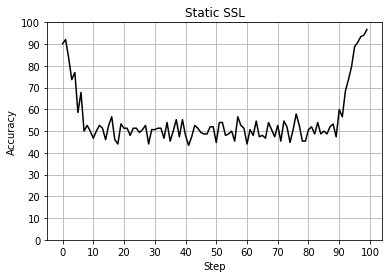

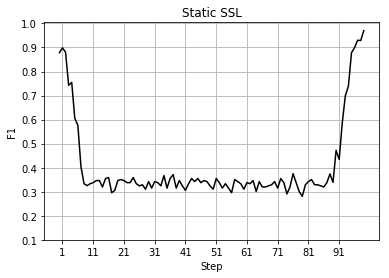




METHOD: Sliding sgd as classifier
The number of class labels must be greater than one.
METHOD: Incremental sgd as classifier
Execution time:  0.5326240386655273
Average MCC:  0.0969809634395
Average macro-F1: 0.39463306016689936
Average Accuracy:  54.2237
Standard Deviation:  11.3414522575
Variance:  128.62853931


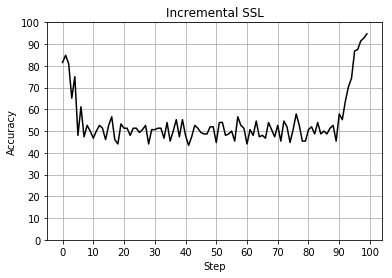

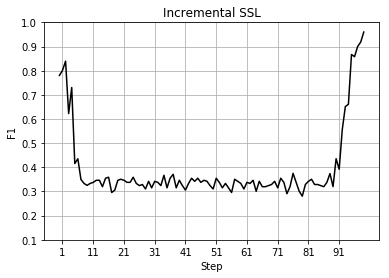




METHOD: sgd as classifier and kde as core support extraction with cutting data method
Execution time:  1.0023640521845558
Average MCC:  0.901000380959
Average macro-F1: 0.9480980264944049
Average Accuracy:  94.5466
Standard Deviation:  3.06485178108
Variance:  9.39331644


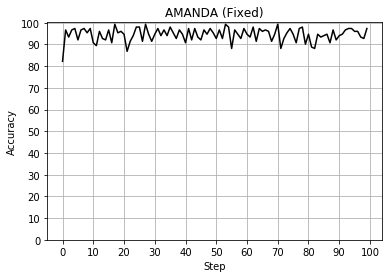

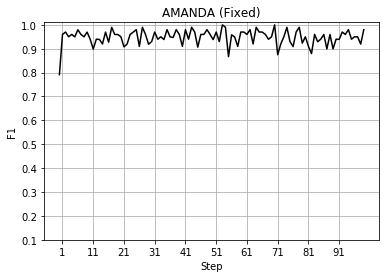




METHOD: sgd as classifier and kde and Hellinger distance as dynamic CSE
Execution time:  4.43917958223753
Average MCC:  0.037255790784
Average macro-F1: 0.35605809592299315
Average Accuracy:  51.5
Standard Deviation:  6.8945326165
Variance:  47.53458


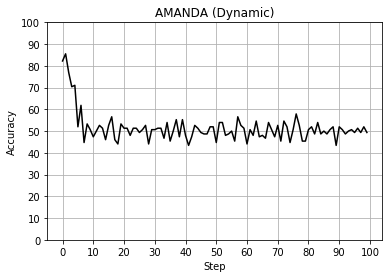

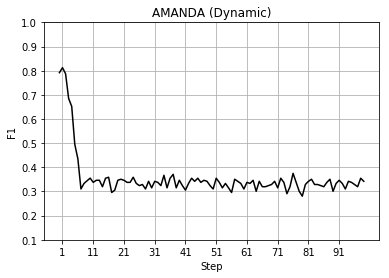




METHOD: None as classifier and GMM with BIC and Mahalanobis as core support extraction
Execution time:  28.18702402412724
Average MCC:  0.882875226125
Average macro-F1: 0.9372368835211544
Average Accuracy:  93.3487
Standard Deviation:  4.06888502049
Variance:  16.55582531


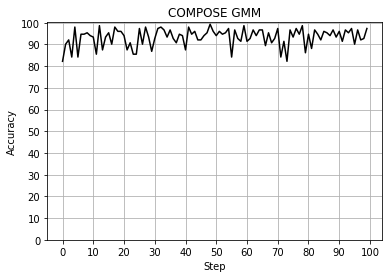

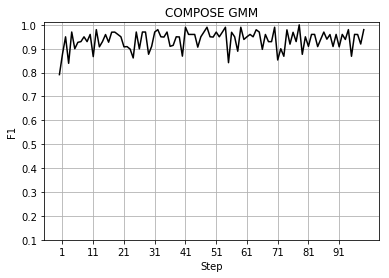




Method: Level IW
Execution time:  28.18702402412724
Average MCC:  -0.011333504012
Average F1:  0.187264022672

C:\Users\raul\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1115: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)



Average Accuracy:  50.263159
Standard Deviation:  17.5617252239
Variance:  308.41419284


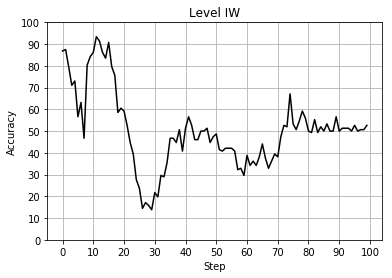

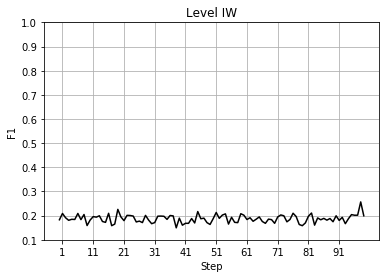

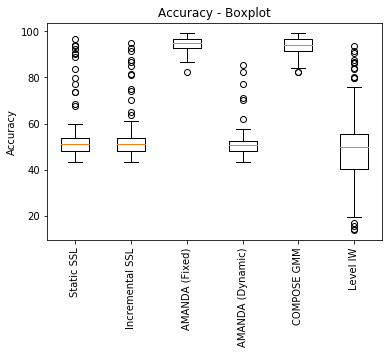

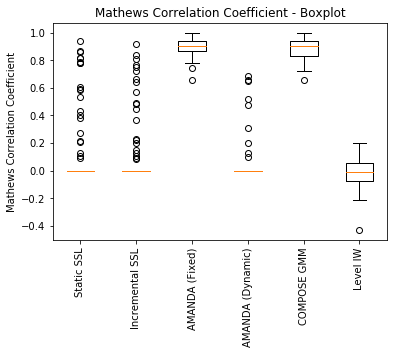

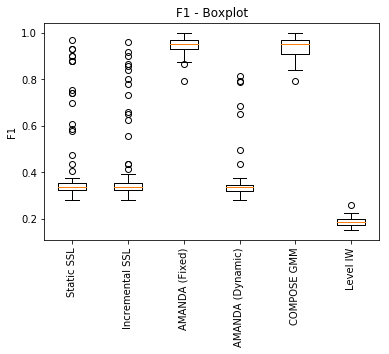

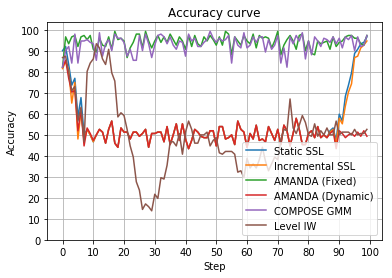

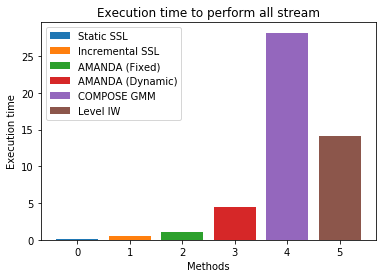

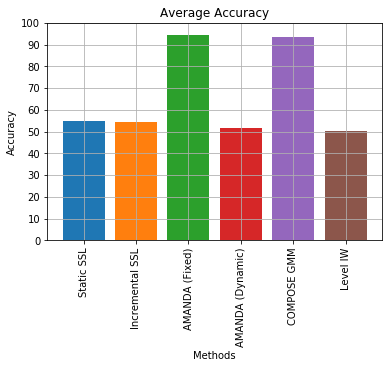

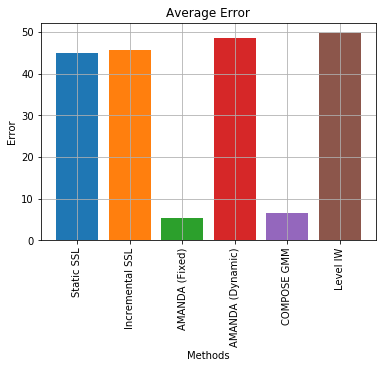

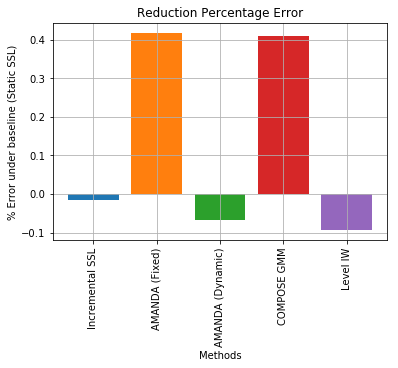

In [1]:
import sys
import os
from pathlib import Path
os.chdir(Path(os.getcwd()).resolve().parents[3])

import setup
from methods import runExperiments
from methods import static_classifier
from methods import amanda_dynamic
from methods import amanda_fixed
from methods import incremental_LN
from methods import deslizante_LN
from methods import compose_gmm_version


class Experiment():
     def __init__(self, method, K=None, excludingPercentage=None, densityFunction=None, clfName=None):
        self.method = method
        self.clfName = clfName
        self.densityFunction=densityFunction
        self.excludingPercentage = excludingPercentage
        self.K_variation = K


def loadLevelResults(path, sep, key, steps):
    originalAccs, F1s, time = setup.loadLevelIwBoxplotResults(path, sep)
    predictions = F1s[key]
    predictions = [ predictions[i::steps] for i in range(steps) ]
    
    return predictions, originalAccs[key], time[key]


def main():
    experiments = {}
    is_windows = sys.platform.startswith('win')
    sep = '\\'

    if is_windows == False:
        sep = '/'

    path = os.getcwd()+sep+'data'+sep
    
    # SETTINGS
    sslClassifier = 'sgd' # lp = label propagation, rf = random forests, nb = naive bayes, knn = k-nn, sgd = stochastic gradient descent
    steps = 100
    poolSize = None
    isBatchMode = True # False = Stream
    isBinaryClassification = True
    isImbalanced = False
    externalResults = []
    
    # Load dataset
    dataValues, dataLabels, description = setup.load2CDT(path, sep)
    
    # Only 5% of initial labeled data - Extreme verification latency scenario
    labeledData = int(0.05*len(dataLabels))

    # Static SSL
    experiments[0] = Experiment(static_classifier, 12, clfName=sslClassifier)
    
    # Sliding SSL
    experiments[1] = Experiment(deslizante_LN, 12, clfName=sslClassifier)
    
    # Incremental SSL
    experiments[2] = Experiment(incremental_LN, 12, clfName=sslClassifier)
    
    # Proposed Method 1 (AMANDA - Fixed core extraction percentage)
    experiments[3] = Experiment(amanda_fixed, 12, 0.75, "kde", clfName=sslClassifier)

    # Proposed method 2 (AMANDA - Dynamic core extraction percentage)
    experiments[4] = Experiment(amanda_dynamic, 12, None, "kde", clfName=sslClassifier)

    # COMPOSE GMM (Python version)
    experiments[5] = Experiment(compose_gmm_version, 12)
    
    # levelIw matlab results
    predictionsLevelIw, originalAccsLevelIw, timeLevelIw = loadLevelResults(path, sep, '2CDT', steps)
    externalResults.append({"name":"Level IW", "predictions":predictionsLevelIw, "accuracies":originalAccsLevelIw, "time":timeLevelIw})
    
    # Run experiments
    runExperiments.run(dataValues, dataLabels, description, isBinaryClassification, isImbalanced, 
                       experiments, steps, labeledData, isBatchMode, poolSize, externalResults)
    

if __name__ == "__main__":
    main()